In [ ]:
# Made by Vedant Varma
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt

In [2]:
(mnist_train_imgs, mnist_train_labels), (mnist_test_imgs, mnist_test_labels) = mnist.load_data()

In [3]:
train_imgs = mnist_train_imgs.reshape(60000, 784)
test_imgs = mnist_test_imgs.reshape(10000, 784)
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')
#normalize the data in 0 to 1 range
train_imgs /= 255
test_imgs /= 255

In [4]:
type(test_imgs)

numpy.ndarray

In [5]:
#one hot encode the 0-9 labels data
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


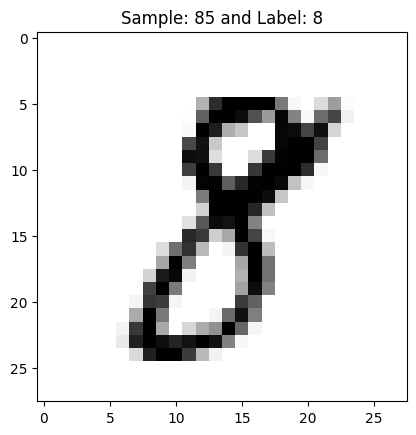

In [6]:
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    img = train_imgs[num].reshape([28,28])
    plt.title('Sample: %d and Label: %d' % (num,label))
    plt.imshow(img, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(85)

In [7]:
#model creation
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))# input layer
model.add(Dense(10, activation='softmax'))#output layer

c:\Users\varve\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#setting up the loss function and optimizer
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_imgs, train_labels,
                    batch_size = 100,
                    epochs = 10,
                    verbose = 2,
                    validation_data = (test_imgs, test_labels))

Epoch 1/10
600/600 - 2s - 3ms/step - accuracy: 0.9287 - loss: 0.2479 - val_accuracy: 0.9638 - val_loss: 0.1215
Epoch 2/10
600/600 - 2s - 3ms/step - accuracy: 0.9702 - loss: 0.0986 - val_accuracy: 0.9733 - val_loss: 0.0873
Epoch 3/10
600/600 - 2s - 3ms/step - accuracy: 0.9806 - loss: 0.0657 - val_accuracy: 0.9762 - val_loss: 0.0745
Epoch 4/10
600/600 - 2s - 3ms/step - accuracy: 0.9862 - loss: 0.0468 - val_accuracy: 0.9779 - val_loss: 0.0677
Epoch 5/10
600/600 - 2s - 3ms/step - accuracy: 0.9894 - loss: 0.0346 - val_accuracy: 0.9775 - val_loss: 0.0665
Epoch 6/10
600/600 - 2s - 3ms/step - accuracy: 0.9922 - loss: 0.0261 - val_accuracy: 0.9794 - val_loss: 0.0637
Epoch 7/10
600/600 - 2s - 3ms/step - accuracy: 0.9944 - loss: 0.0196 - val_accuracy: 0.9804 - val_loss: 0.0616
Epoch 8/10
600/600 - 2s - 3ms/step - accuracy: 0.9958 - loss: 0.0154 - val_accuracy: 0.9796 - val_loss: 0.0670
Epoch 9/10
600/600 - 2s - 3ms/step - accuracy: 0.9970 - loss: 0.0108 - val_accuracy: 0.9814 - val_loss: 0.0661
E

In [ ]:
score = model.evaluate(test_imgs, test_labels)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.9792 - loss: 0.0740
Test loss:  0.06117391213774681
Test accuracy:  0.9828000068664551


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


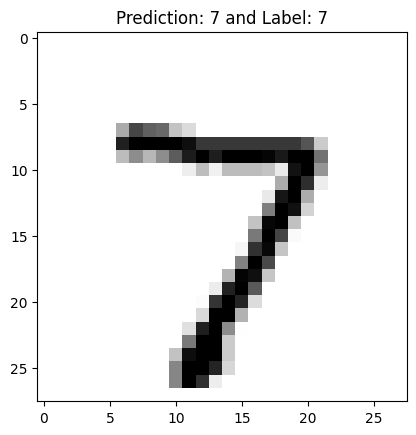

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


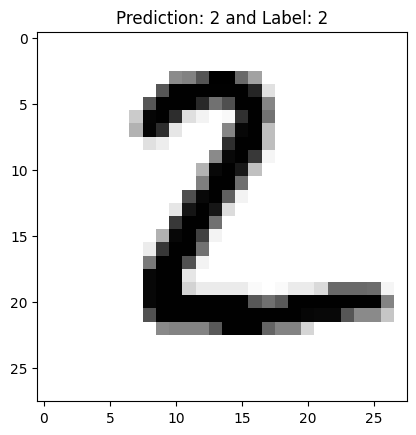

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


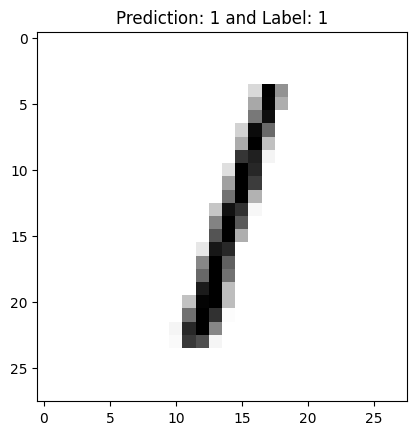

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


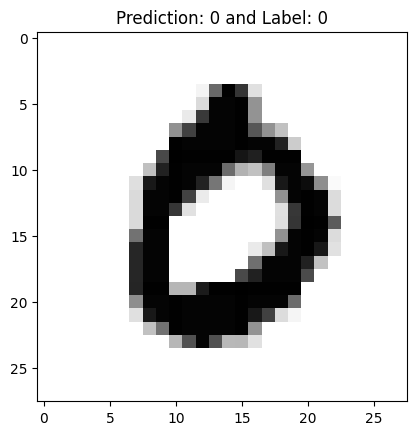

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


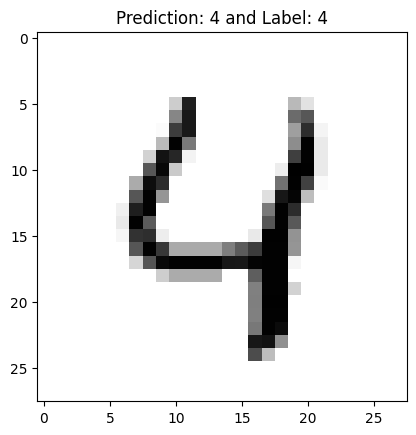

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


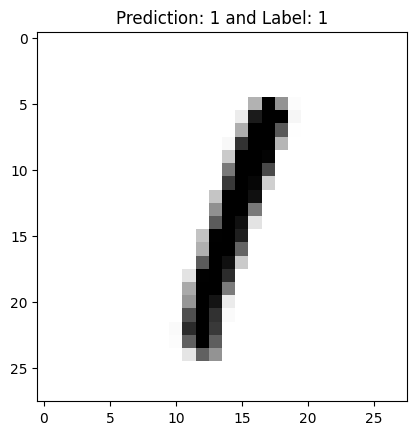

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


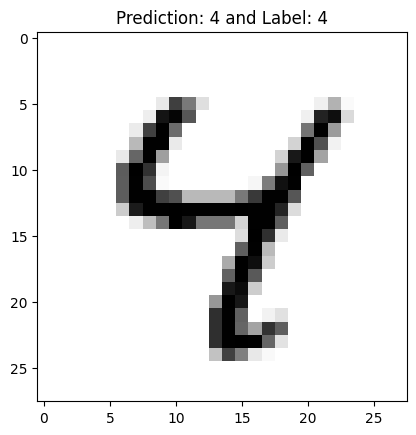

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


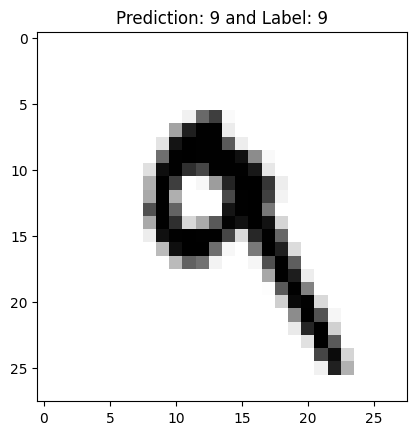

Success Classifications: 8 
 Unsuccess Classifications: 0


In [13]:
scount = 0
ncount = 0
for x in range(8):
    testi = test_imgs[x, :].reshape(1, 784)
    pred = model.predict(testi).argmax()
    lab = test_labels[x].argmax()
    plt.title('Prediction: %d and Label: %d' % (pred,lab))
    plt.imshow(testi.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    if (pred == lab):
        scount += 1
    else:
        ncount +=1
print('Success Classifications: %d \n Unsuccess Classifications: %d' % (scount, ncount))